<a href="https://colab.research.google.com/github/luanchezan/DataAnalystPortfolio/blob/luanchezan-project-3/Movie_correlation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,12)

pd.options.mode.chained_assignment = None


In [ ]:
# Now we need to read in the data
df = pd.read_csv('/content/movies.csv', encoding="latin-1")
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [ ]:
#Changing the data type to a integer value so we could eliminate the unnecesary decimal value

df['budget'] = df.budget.astype(int)
df['gross'] = df.gross.astype(int)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [ ]:
# Checking if there's any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   int64  
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   int64  
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 799.3+ KB


In [ ]:
# Checking if there's any NaN data
df.isna().any(), df.isna().any().sum()

(budget      False
 company     False
 country     False
 director    False
 genre       False
 gross       False
 name        False
 rating      False
 released    False
 runtime     False
 score       False
 star        False
 votes       False
 writer      False
 year        False
 dtype: bool, 0)

In [ ]:
# Showing the percentage of missing data in the dataset

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [ ]:
# Showing the data type of each column

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

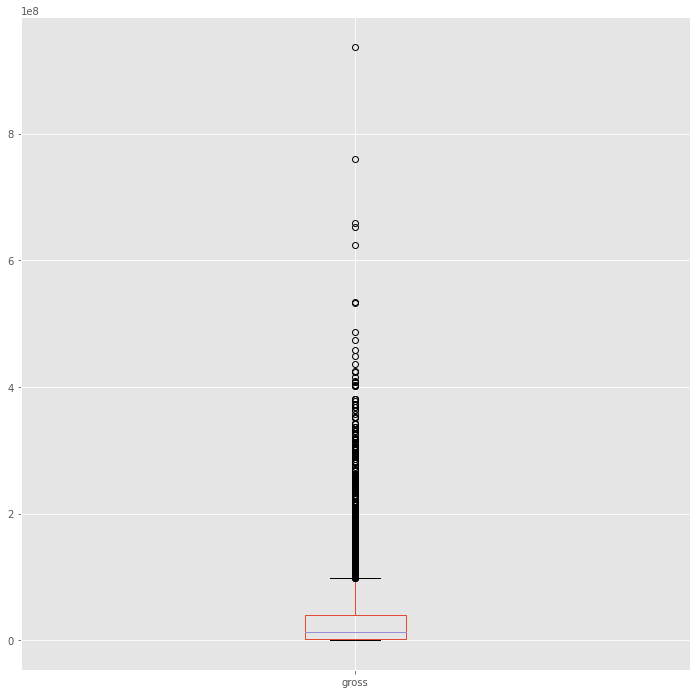

In [ ]:
# Showing Outliers?

df.boxplot(column=['gross'])


In [ ]:
#Checking for duplicated data
df.duplicated().any()

False

In [ ]:
# Showing data order by the highest value to the lowest

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997


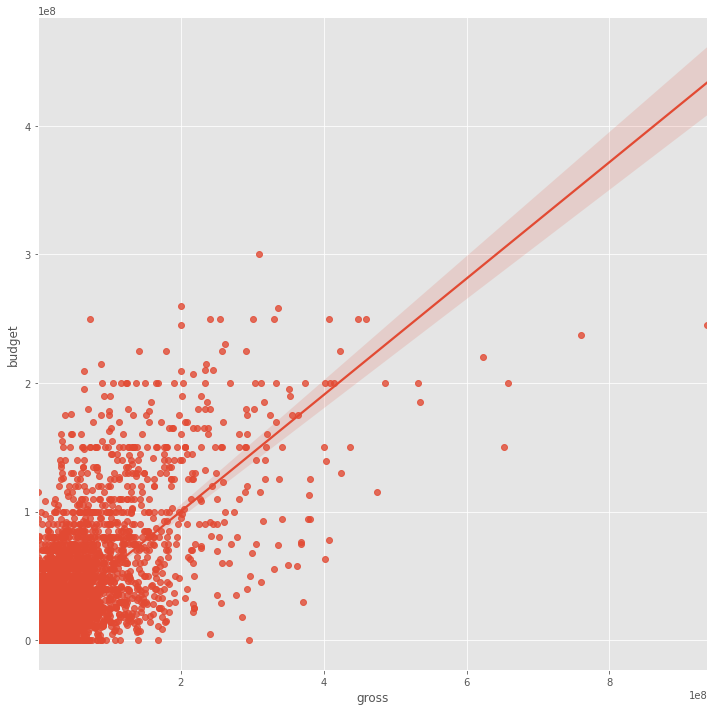

In [ ]:
#Showing correlation between the budget and the gross
sns.regplot(x="gross", y="budget", data=df)

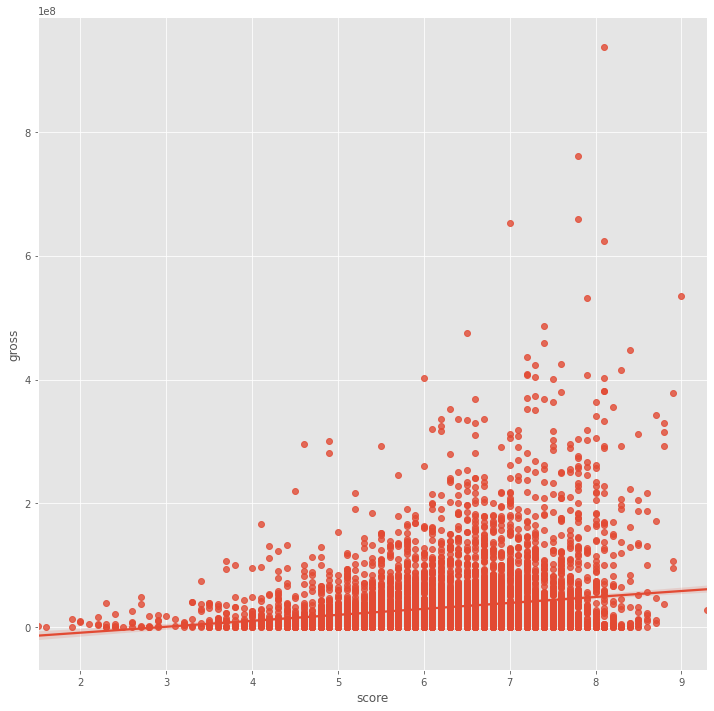

In [ ]:
#Showing correlation between the score and the gross
sns.regplot(x="score", y="gross", data=df)

In [ ]:
# Pearson's correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [ ]:
# Kendall's correlation Matrix between all numeric columns

df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [ ]:
# Spearman's correlation Matrix between all numeric columns

df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


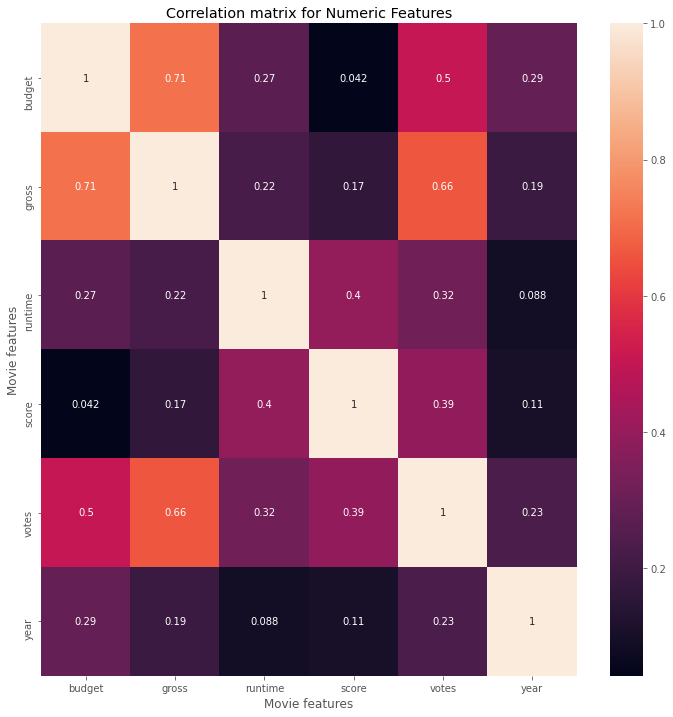

In [ ]:
# Pearson's correlation Matrix showed with a Seaborn heatmap

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,-0.053390,-0.058972,0.098884,0.009617,0.265780,0.260056,0.033532,0.267866,0.182441,-0.019359,0.082724,0.276622,0.168884,0.274476
company,-0.053390,1.000000,0.207891,0.528937,0.083304,0.595539,0.585783,0.035007,0.590363,-0.017205,-0.028393,0.499675,0.556854,0.525347,0.589459
country,-0.058972,0.207891,1.000000,0.139928,0.026460,0.110702,0.109299,0.170565,0.114623,0.088068,-0.010712,0.153764,0.101652,0.138723,0.107460
director,0.098884,0.528937,0.139928,1.000000,0.050684,0.718102,0.708987,0.059209,0.714279,-0.048564,-0.015889,0.621374,0.692806,0.711480,0.716466
genre,0.009617,0.083304,0.026460,0.050684,1.000000,0.061585,0.064614,0.045332,0.063290,0.068504,-0.044007,0.064794,0.057885,0.054884,0.063244
gross,0.265780,0.595539,0.110702,0.718102,0.061585,1.000000,0.980170,0.015757,0.988701,0.067788,-0.036941,0.696549,0.963910,0.795554,0.997612
name,0.260056,0.585783,0.109299,0.708987,0.064614,0.980170,1.000000,0.016060,0.971935,0.065114,-0.035479,0.686017,0.946291,0.786625,0.980672
rating,0.033532,0.035007,0.170565,0.059209,0.045332,0.015757,0.016060,1.000000,0.018538,0.019492,0.012675,0.083682,0.007277,0.037288,0.012236
released,0.267866,0.590363,0.114623,0.714279,0.063290,0.988701,0.971935,0.018538,1.000000,0.073431,-0.039006,0.692609,0.955360,0.790091,0.989946
runtime,0.182441,-0.017205,0.088068,-0.048564,0.068504,0.067788,0.065114,0.019492,0.073431,1.000000,-0.010943,-0.005030,0.080750,0.016035,0.075231


In [ ]:
#Change scientific notation to floating format
pd.set_option('display.float_format', lambda x:'%.3f'%x)

In [ ]:
gross_by_country = df.groupby('country').gross.agg(['sum'])
gross_by_country.sort_values(by='sum', ascending=False).head(15)

,sum
country,
USA,197934880427
UK,14209816197
Germany,3199462543
France,3037066879
Canada,2296115123
Australia,1623710687
Japan,1165489704
China,1005234480
New Zealand,933289753


In [ ]:
gross_by_country = gross_by_country.sort_values(by='sum', ascending=False).head(15)
gross_by_country = gross_by_country.rename(columns={'sum':'gross_total'})
gross_by_country

,gross_total
country,
USA,197934880427
UK,14209816197
Germany,3199462543
France,3037066879
Canada,2296115123
Australia,1623710687
Japan,1165489704
China,1005234480
New Zealand,933289753


In [ ]:
df.groupby('country').country.count().sort_values(ascending=False)

country
USA                               4872
UK                                 698
France                             283
Canada                             150
Germany                            134
Australia                           82
Japan                               68
Spain                               56
Italy                               51
Ireland                             44
India                               39
Hong Kong                           39
Denmark                             33
China                               24
South Korea                         20
Belgium                             18
Sweden                              18
New Zealand                         18
Mexico                              15
Argentina                           13
Netherlands                         12
Iran                                12
Russia                              10
South Africa                         9
Czech Republic                       8
Norway           

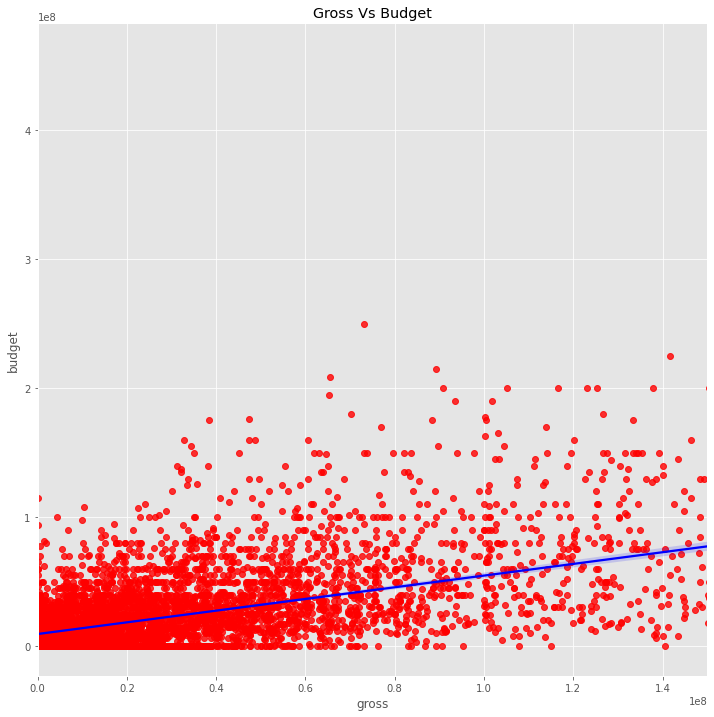

In [ ]:
#Plotting Gross vs Budget
#Answering the bigger the budget invested on the film the more will be the revenue hypothesis
plt.figure(figsize=(12,12))
plt.xlabel('Gross revenue')
plt.ylabel('Budget invested')
plt.title('Gross Vs Budget')
plt.xlim(0, 1.5e8)
sns.regplot(x='gross', y='budget', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [ ]:
#Changing countries and companies to categorical columns 

df_cats = df.copy()

df_cats[['company', 'star', 'country', 'director']].astype('category')

,company,star,country,director
0,Columbia Pictures Corporation,Wil Wheaton,USA,Rob Reiner
1,Paramount Pictures,Matthew Broderick,USA,John Hughes
2,Paramount Pictures,Tom Cruise,USA,Tony Scott
3,Twentieth Century Fox Film Corporation,Sigourney Weaver,USA,James Cameron
4,Walt Disney Pictures,Joey Cramer,USA,Randal Kleiser
...,...,...,...,...
6815,Fox Searchlight Pictures,Jennifer Saunders,UK,Mandie Fletcher
6816,Siempre Viva Productions,Selma Blair,USA,Paul Duddridge
6817,Warner Bros. Animation,Kevin Conroy,USA,Sam Liu
6818,Borderline Presents,Kika Magalhães,USA,Nicolas Pesce


In [ ]:
#Changing certains variables so they can be plotted
df_cats[['company', 'star', 'country', 'director']] = df_cats[['company', 'star', 'country', 'director']].astype('category')
df_cats['company'] = df_cats['company'].cat.codes
df_cats['star'] = df_cats['star'].cat.codes
df_cats['country'] = df_cats['country'].cat.codes
df_cats['director'] = df_cats['director'].cat.codes

In [ ]:
df_cats.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.100,2454,299174,Stephen King,1986
1,6000000,1680,54,1296,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.800,1605,264740,John Hughes,1986
2,15000000,1680,54,2645,Action,179800601,Top Gun,PG,1986-05-16,110,6.900,2345,236909,Jim Cash,1986
3,18500000,2062,54,1066,Action,85160248,Aliens,R,1986-07-18,137,8.400,2192,540152,James Cameron,1986
4,9000000,2122,54,2123,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.900,1139,36636,Mark H. Baker,1986


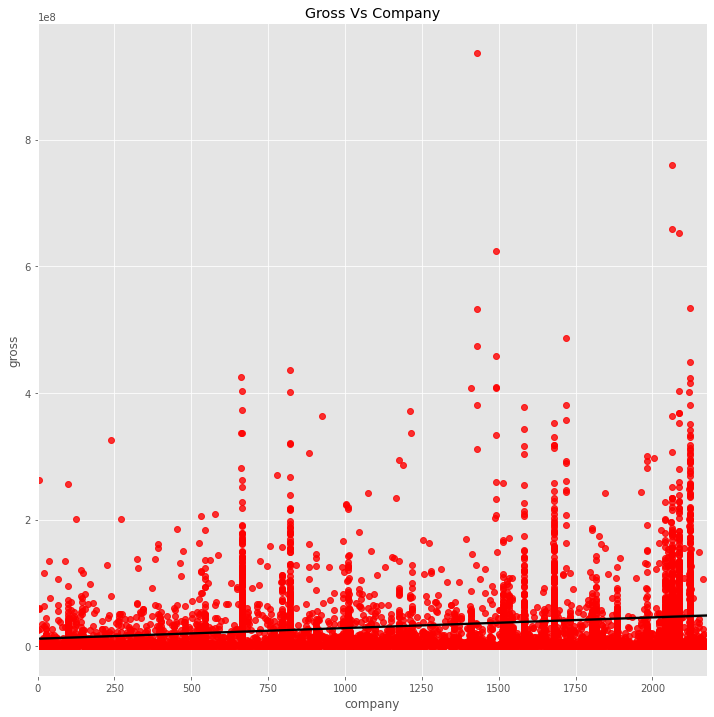

In [38]:
#Ploting Company vs Budget
#Responding to the emerging doubt of knowing if the biggest companies has the best revenues
plt.figure(figsize=(12,12))
plt.xlabel('Gross revenue')
plt.ylabel('Company producing the film')
plt.title('Gross Vs Company')
sns.regplot(x='company', y='gross', data=df_cats, scatter_kws={'color': 'red'}, line_kws={'color':'black'})

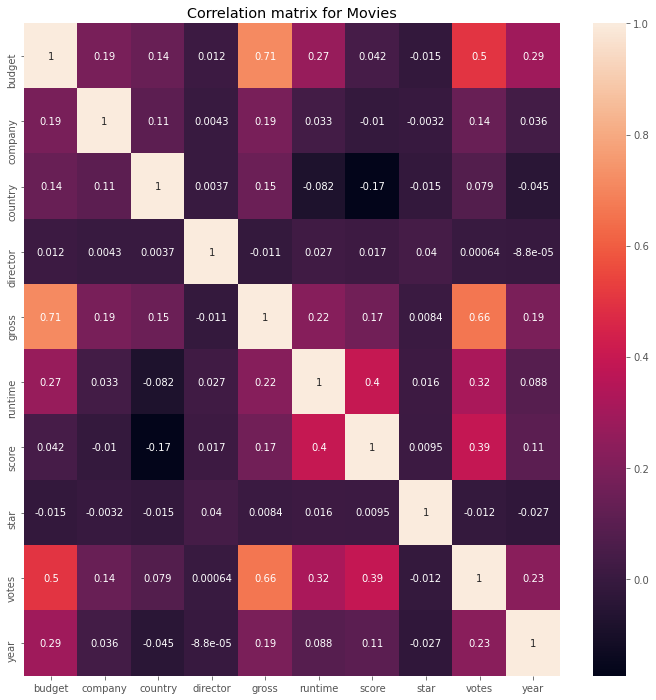

In [ ]:
#Pearson correlation in the new dataframe
plt.figure(figsize=(12,12))

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

sns.heatmap(df_cats.corr(), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; y

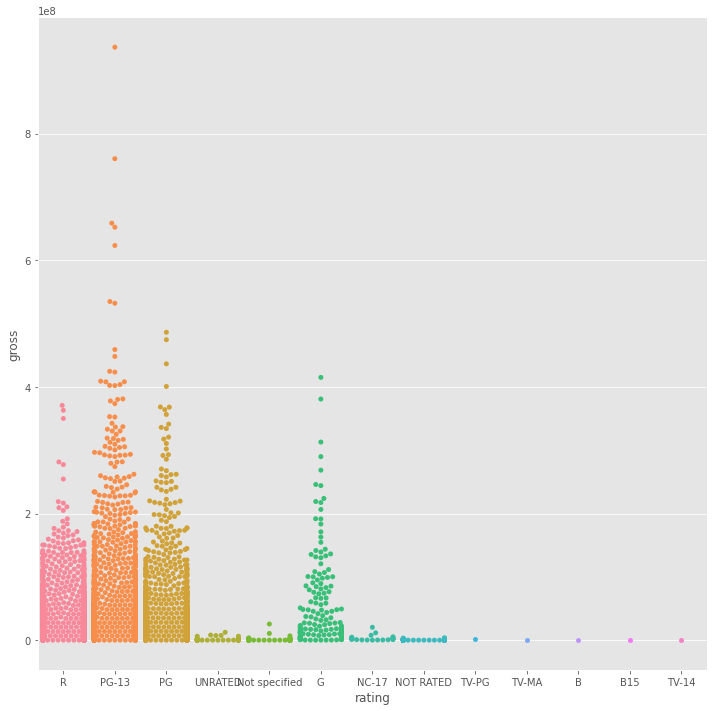

In [ ]:
#Ploting the rating vs gross
#This will allow us to understand what audience do normally pays more
sns.swarmplot(x="rating", y="gross", data=df)